### Importação de Pacotes

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importação dos Dados

In [37]:
# Dataset macro dados.xlsx. Link: https://docs.google.com/spreadsheets/d/1FwgBirl8YnFSM-AX-L2VnFTigseGrhwCHzRX6RuJWUw/edit?usp=sharing

variaveis = pd.read_excel("dados//dados.xlsx", sheet_name = "Dados Bons")
variaveis.set_index("Data", inplace = True)
variaveis.drop(index = pd.to_datetime("2000-01-01"), inplace = True)
variaveis.head()

,T-BOND,GDP Real,Real PCE,M1,Real Disposable,Personal Savings,Exports,Imports,Labor Productivity,NFIB Small Business Optimism,Industrial Production,CPI
Data,,,,,,,,,,,,
2000-04-01,-0.046811,0.0182,0.0068,-0.0016,-0.0026,0.0595,0.0516,0.0737,0.6667,0.0233,0.0139,0.0896
2000-07-01,-0.045872,0.0010,0.0069,-0.0126,0.0218,0.0572,0.0189,0.0570,-0.2500,-0.0227,0.0007,-0.8740
2000-10-01,-0.055430,0.0059,0.0061,0.0030,-0.0166,-0.0547,0.0097,-0.0091,-0.1667,-0.0466,-0.0025,-3.1400
2001-01-01,-0.092814,-0.0032,0.0013,0.0016,0.0235,0.1172,-0.0414,-0.0616,-0.0400,0.0977,-0.0157,-2.2702
2001-04-01,0.043564,0.0062,-0.0004,0.0201,0.0081,-0.0781,-0.0220,-0.0082,-0.0833,0.0142,-0.0135,2.0418


In [87]:
# Download de dados trimestrais do target S&P 500 

import yfinance as yf

spy_ohlc_df = yf.download('SPY', start = '2000-01-01', interval = "3mo")
spy_ohlc_df.dropna(inplace = True)
spy_ohlc_df["Alvo"] = spy_ohlc_df["Adj Close"].pct_change(1)
spy_ohlc_df = spy_ohlc_df["Alvo"]
spy_ohlc_df.head()

[*********************100%***********************]  1 of 1 completed


Date
2000-01-01         NaN
2000-04-01   -0.031419
2000-07-01   -0.009073
2000-10-01   -0.084302
2001-01-01   -0.107782
Name: Alvo, dtype: float64

In [88]:
df = variaveis.join(spy_ohlc_df)
df.head()

,T-BOND,GDP Real,Real PCE,M1,Real Disposable,Personal Savings,Exports,Imports,Labor Productivity,NFIB Small Business Optimism,Industrial Production,CPI,Alvo
Data,,,,,,,,,,,,,
2000-04-01,-0.046811,0.0182,0.0068,-0.0016,-0.0026,0.0595,0.0516,0.0737,0.6667,0.0233,0.0139,0.0896,-0.031419
2000-07-01,-0.045872,0.0010,0.0069,-0.0126,0.0218,0.0572,0.0189,0.0570,-0.2500,-0.0227,0.0007,-0.8740,-0.009073
2000-10-01,-0.055430,0.0059,0.0061,0.0030,-0.0166,-0.0547,0.0097,-0.0091,-0.1667,-0.0466,-0.0025,-3.1400,-0.084302
2001-01-01,-0.092814,-0.0032,0.0013,0.0016,0.0235,0.1172,-0.0414,-0.0616,-0.0400,0.0977,-0.0157,-2.2702,-0.107782
2001-04-01,0.043564,0.0062,-0.0004,0.0201,0.0081,-0.0781,-0.0220,-0.0082,-0.0833,0.0142,-0.0135,2.0418,0.053476


In [114]:
df.describe()

,T-BOND,GDP Real,Real PCE,M1,Real Disposable,Personal Savings,Exports,Imports,Labor Productivity,NFIB Small Business Optimism,Industrial Production,CPI,Alvo
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,-0.019355,0.004515,0.003109,0.045694,0.006066,0.053413,0.009946,0.011470,0.081617,0.000843,0.000870,0.464063,0.018161
std,0.124930,0.014373,0.015498,0.230548,0.022186,0.280607,0.056293,0.063977,2.311354,0.038729,0.024939,6.329673,0.084183
min,-0.501211,-0.089400,-0.097700,-0.018800,-0.082200,-0.467000,-0.233100,-0.223900,-6.500000,-0.076400,-0.134600,-8.005400,-0.217499
25%,-0.084219,0.002575,0.001150,0.006300,0.001925,-0.056875,-0.013875,-0.028650,-0.391450,-0.025300,-0.008250,-0.869525,-0.016355
50%,-0.022851,0.005750,0.003950,0.014300,0.006100,0.029550,0.010750,0.010600,-0.075000,-0.006150,0.005300,-0.327400,0.027976
75%,0.036238,0.008050,0.006075,0.026075,0.010325,0.096925,0.053325,0.051200,0.372150,0.018075,0.011875,0.595225,0.064530
max,0.362473,0.075500,0.089000,2.075900,0.115200,1.961400,0.143200,0.178800,16.000000,0.153500,0.112800,48.991000,0.203388


In [117]:
# Quantidade de NA's

df.isna().sum()

T-BOND                          0
GDP Real                        0
Real PCE                        0
M1                              0
Real Disposable                 0
Personal Savings                0
Exports                         0
Imports                         0
Labor Productivity              0
NFIB Small Business Optimism    0
Industrial Production           0
CPI                             0
Alvo                            0
dtype: int64

# REGRESSÃO LINEAR

### Conjuntos de dados de treino e teste

In [145]:
from sklearn.model_selection import train_test_split

x = df.drop("Alvo", axis = 1)
y = df["Alvo"]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, shuffle = False)

### Análise das variáveis

(0.0, 10.0)

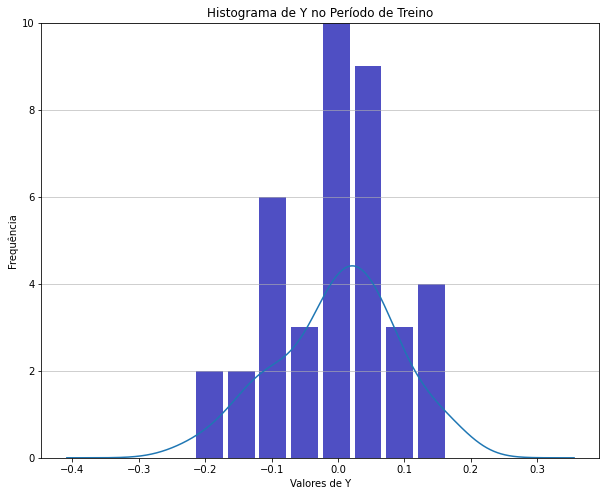

In [196]:
# Histograma de Y no Período de Treino
fig, ax = plt.subplots(figsize = (10,8))
y_train.plot(kind = "kde")
n, bins, patches = plt.hist(y_train, bins = 'auto', color = '#0504aa', alpha = 0.7, rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Valores de Y')
plt.ylabel('Frequência')
plt.title('Histograma de Y no Período de Treino')
maxfreq = y_train.max()
plt.ylim(ymax = np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [112]:
# Correlações com o Alvo

df.corr()['Alvo'].drop('Alvo').abs().sort_values(ascending = False)

M1                              0.255691
Real Disposable                 0.227479
T-BOND                          0.166370
Exports                         0.152373
Imports                         0.115525
NFIB Small Business Optimism    0.089669
Labor Productivity              0.083729
GDP Real                        0.070301
CPI                             0.041256
Industrial Production           0.023462
Personal Savings                0.008896
Real PCE                        0.002389
Name: Alvo, dtype: float64

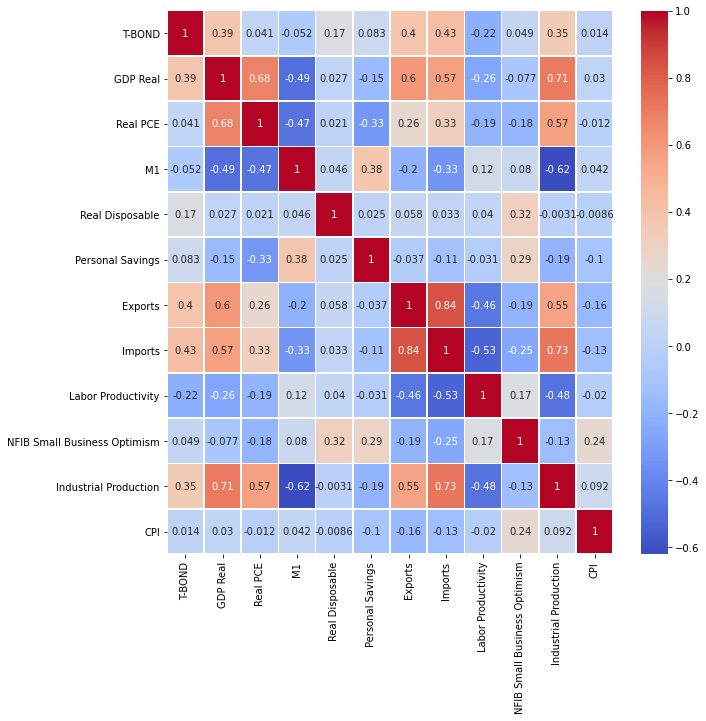

In [113]:
# Correlações entre as Variáveis

correl_hm = x_train.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correl_hm, cmap = "coolwarm", annot = True, linewidths = .6, ax = ax);

### Ajuste da Regressão Linear e Previsões

In [119]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [146]:
# Acrescentando intercepto
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

# Ajustando o modelo
lr_sm = sm.OLS(y_train, x_train_).fit()

# Previsões no conjunto de treino
y_pred_train_sm = lr_sm.predict(x_train_)

# Previsões no conjunto de teste
y_pred_test_sm = lr_sm.predict(x_test_)

lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Alvo   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2.902
Date:                Fri, 26 Nov 2021   Prob (F-statistic):            0.00987
Time:                        19:20:06   Log-Likelihood:                 57.763
No. Observations:                  41   AIC:                            -89.53
Df Residuals:                      28   BIC:                            -67.25
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0203      0.022     -0.930      0.360      -0.065       0.024
T-BOND                           0.5576      0.167      3.348      0.002       0.216       0.899
GDP Real                         0.0800      3.273      0.024      0.981      -6.625       6.785
Real PCE                         5.3032      3.456      1.534      0.136      -1.776      12.382
M1                               0.6926      1.017      0.681      0.501      -1.391       2.776
Real Disposable                  0.1370      1.306      0.105      0.917      -2.538       2.812
Personal Savings                -0.1242      0.062     -1.988      0.057      -0.252       0.004
Exports                          0.9680      0.476      2.035      0.051      -0.007       1.943
Imports                         -0.5607      0.406     -1.382      0.178      -1.392       0.270
Labor Productivity               0.0018      0.006      0.320      0.751      -0.010       0.013
NFIB Small Business Optimism     0.0709      0.417      0.170      0.866      -0.784       0.925
Industrial Production           -0.1882      1.390     -0.135      0.893      -3.035       2.658
CPI                             -0.0002      0.002     -0.148      0.884      -0.004       0.003
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.413
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.115
Skew:                           0.085   Prob(JB):                        0.944
Kurtosis:                       2.805   Cond. No.                     2.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Avaliação dos resultados


Pressupostos iniciais para se obter uma boa regressão: 

* Existência de relação linear entre x e y (correlação positiva)
* Ausência de correlação entre as variáveis explicativas (X's)
* Variância constante na distribuição dos resíduos (Homocedasticidade - BP ou GQ < 0.05)
* Ausência de correlação entre os resíduos e seus valores anteriores (Correlação Serial - BG, DW ou BP < 0.05)
* Resíduos seguem uma distribuição normal (Jarque-Bera < 0.05)

Outros testes importantes (a P-valor < 0.05):

* Chow -> modelo não apresenta quebra estrutural 
* Teste-F -> modelo restrito é tão bom quanto o irrestrito
* RESET -> não há melhores formas funcionais para modelagem da regressão

In [147]:
# Mean Absolute Error
MAE_train_sm = sm.tools.eval_measures.meanabs(y_train, y_pred_train_sm) 
MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test_sm) 

# R-Quadrado (não pode ser calculado na base de teste)
R2_train_sm = lr_sm.rsquared 

# Root Mean Squared Error
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train_sm)
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test_sm)

print("----- Desempenho no Período de Treinamento -----")
print("MAE: ", round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE: ', round(RMSE_train_sm,2))

print("")
print("----- Desempenho no Período de Teste -----")
print("MAE: ", round(MAE_test_sm,2))
print('RMSE: ', round(RMSE_test_sm,2))

----- Desempenho no Período de Treinamento -----
MAE:  0.05
R2:  0.55
RMSE:  0.06

----- Desempenho no Período de Teste -----
MAE:  0.09
RMSE:  0.14


In [154]:
# Avaliação do MAE da base de teste
print("A média do Alvo é: ")
print(round(y_test.mean(),2))
print()
print("O percentual do MAE em relaçao à média do Alvo (bom <= 10%): ")
print(round(MAE_test_sm/y_test.mean()*100,2))

A média do Alvo é: 
0.04

O percentual do MAE em relaçao à média do Alvo (bom <= 10%): 
243.31


In [182]:
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test_sm})
resultados.head(5)

,Real,Previsto
Data,,
2010-07-01,0.110957,-0.111226
2010-10-01,0.107713,0.126910
2011-01-01,0.059939,0.110997
2011-04-01,-0.000352,-0.022239
2011-07-01,-0.138358,-0.124666


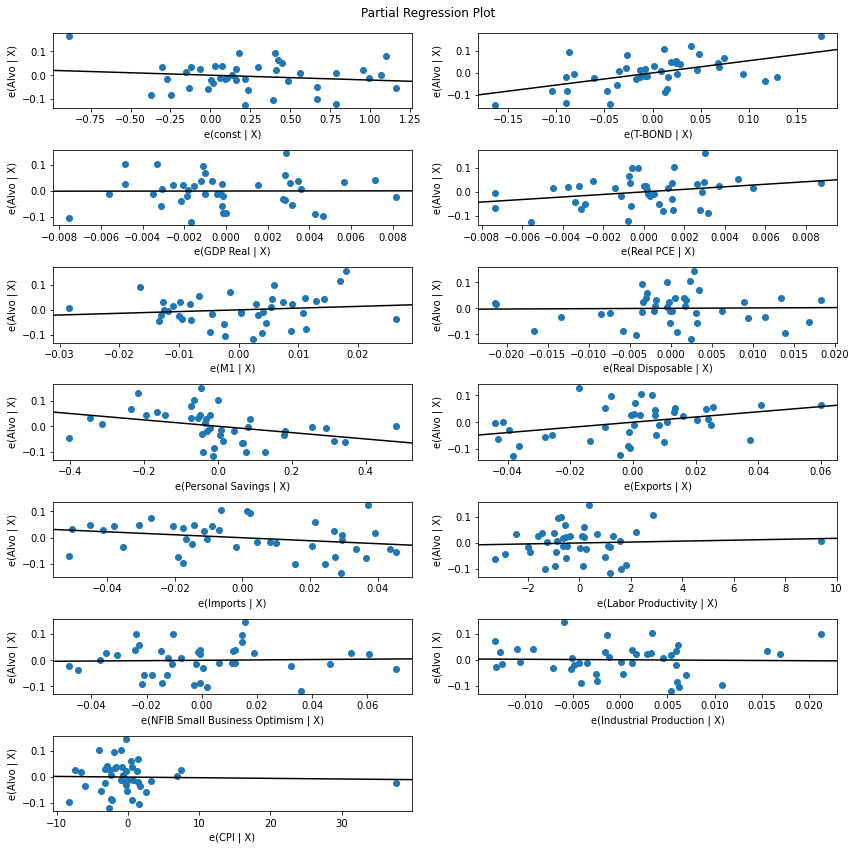

In [131]:
# Efeitos parciais das variáveis

fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_partregress_grid(lr_sm, fig = fig)

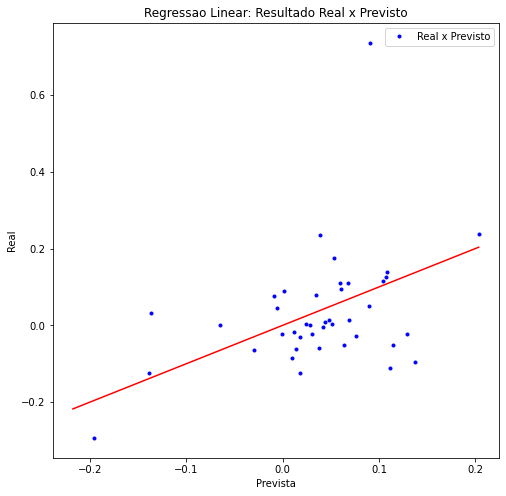

In [175]:
# Comparação resultado previsto x observado
plt.figure(figsize = (8,8))
plt.plot(y_test, y_pred_test_sm, ".", color = "blue", label = "Real x Previsto")
plt.legend()
plt.xlabel("Prevista")
plt.ylabel("Real")
plt.title("Regressao Linear: Resultado Real x Previsto")

# Reta Y = X
y_x = np.linspace(min(df["Alvo"]), max(df["Alvo"]), len(df)) 
plt.plot(y_x, y_x, color = "red", label = "Reta Y = X")

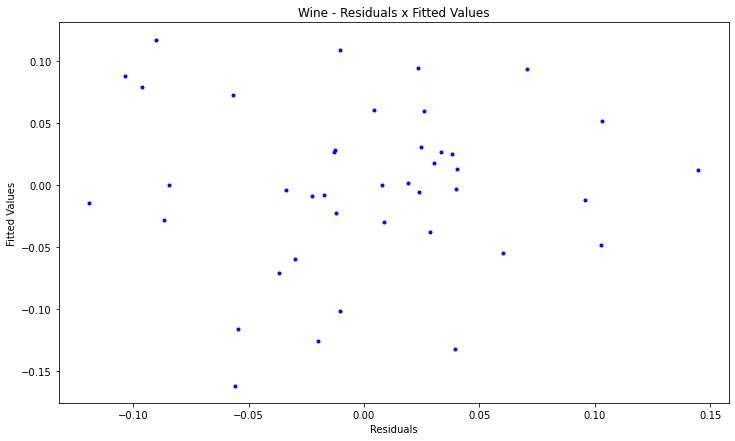

In [179]:
# Residuals x Fitted Values

plt.figure(figsize = (12,7))
plt.plot(lr_sm.resid, y_pred_train_sm, ".", color = "blue")
plt.xlabel("Resíduos")
plt.ylabel("Valores Previstos")
plt.title("Regressao Linear: Resíduo x Previsto")

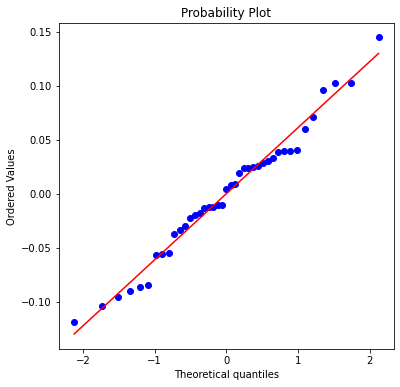

In [181]:
# Normality Quantile-Quantile plot 

import scipy as sp
fig, ax = plt.subplots(figsize=(6,6))
sp.stats.probplot(lr_sm.resid, plot = ax, fit = True);

### Treinando novamente o modelo sem as variáveis insignificantes

In [132]:
df.columns

Index(['T-BOND', 'GDP Real', 'Real PCE', 'M1', 'Real Disposable',
       'Personal Savings', 'Exports', 'Imports', 'Labor Productivity',
       'NFIB Small Business Optimism', 'Industrial Production', 'CPI', 'Alvo'],
      dtype='object')

In [136]:
df_2 = df[["T-BOND", "Real PCE", "Personal Savings", "Exports", "Imports", "Alvo"]]

In [140]:
x = df_2.drop("Alvo", axis = 1)
y = df_2["Alvo"]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, shuffle = False)

lr_sm = sm.OLS(y_train, x_train).fit()

y_pred_train_sm = lr_sm.predict(x_train)
y_pred_test_sm = lr_sm.predict(x_test)

lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Alvo   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.469
Method:                 Least Squares   F-statistic:                              8.230
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                    2.92e-05
Time:                        19:16:14   Log-Likelihood:                          56.819
No. Observations:                  41   AIC:                                     -103.6
Df Residuals:                      36   BIC:                                     -95.07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
T-BOND               0.5806      0.133      4.351      0.000       0.310       0.851
Real PCE             3.7846      1.857      2.038      0.049       0.019       7.551
Personal Savings    -0.1194      0.047     -2.550      0.015      -0.214      -0.024
Exports              1.0024      0.362      2.768      0.009       0.268       1.737
Imports             -0.6984      0.289     -2.420      0.021      -1.284      -0.113
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.199
Skew:                           0.324   Prob(JB):                        0.549
Kurtosis:                       3.531   Cond. No.                         40.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# Mean Absolute Error
MAE_train_sm = sm.tools.eval_measures.meanabs(y_train, y_pred_train_sm) 
MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test_sm) 

# R-Quadrado (não pode ser calculado na base de teste)
R2_train_sm = lr_sm.rsquared 

# Root Mean Squared Error
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train_sm)
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test_sm)

print("----- Desempenho no Período de Treinamento -----")
print("MAE: ", round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE: ', round(RMSE_train_sm,2))

print("")
print("----- Desempenho no Período de Teste -----")
print("MAE: ", round(MAE_test_sm,2))
print('RMSE: ', round(RMSE_test_sm,2))

----- Desempenho no Período de Treinamento -----
MAE:  0.05
R2:  0.53
RMSE:  0.06

----- Desempenho no Período de Teste -----
MAE:  0.11
RMSE:  0.22
